In [1]:

import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
from PIL import Image


In [2]:
def load_images_from_folder(folder):
    images = []
    y = []
#     d = {0:0,2:1, 3:2, 7:3, 8:4}
    for i in folder:
        for filename in os.listdir(i):
#             print(filename)
            img = Image.open(os.path.join(i,filename))
            if img is not None:
                images.append(np.asarray(img))
            # print(int(i[-1]), end="")
            y.append(int(i[-1]))
    images = np.array(images)
    y = np.array(y)
    x_data , y_data = shuffle (images, y)
    return x_data, y_data
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'blue' if val > 90 else 'black'
    return 'color: % s' % color

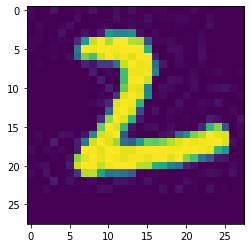

y_train[0]2


In [3]:
train_data, y_train = load_images_from_folder(["./Group_14/train/0", "./Group_14/train/2", "./Group_14/train/3", "./Group_14/train/7", "./Group_14/train/8"])
test_data, y_test = load_images_from_folder(["./Group_14/test/0", "./Group_14/test/2", "./Group_14/test/3", "./Group_14/test/7", "./Group_14/test/8"])
val_data, y_val = load_images_from_folder(["./Group_14/val/0", "./Group_14/val/2", "./Group_14/val/3", "./Group_14/val/7", "./Group_14/val/8"])
train_data = train_data/255
val_data = val_data/255
test_data = test_data/255
plt.imshow(train_data[0])
plt.show()
print("y_train[0]"+str(y_train[0]))

In [4]:
from data import fcnn

optimizers = ["SGD", "VGD","NAG","RMSProp","ADM"]
keras_optimizers= [tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
      tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
      tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
      tf.keras.optimizers.RMSprop(learning_rate=0.0001,rho=0.90, momentum=0.9, epsilon=1e-07),
      tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=True)]
batch = [1,len(train_data),32,32,32]
layers_matrix = np.array([[200,100,50],[512,128,32],[300,400,100],[800,300,50],[400,150,60]])
epoch_each_arch = []
best_arch = {}

In [7]:
def call_fcnn(optimizer_name, keras_optimizer,batch):
    
#     temp = []
    tabulate_epoch = []
    training_acc = []
    val_acc = []
    model_val_acc = 0
    opt_epoch = []
    for i in layers_matrix:
        print(i[0],i[1], i[2])
        fcnn_model = fcnn([28,28],i,len(np.unique(y_train)), keras_optimizer, True)
        fcnn_model._fit_(np.array(train_data), np.array(y_train), epochs=1000, batch_size=batch)
#         temp.append(fcnn_model.end_epoch)
        fcnn_model.plot_err_vs_epoch(optimizer_name)
        opt_epoch.append(fcnn_model.end_epoch)
        
        pred = fcnn_model.prediction(train_data)
        trainAcc = fcnn_model.accuracy(pred, y_train)
        training_acc.append(trainAcc)
        print("Training Accuracy:", trainAcc)
        fcnn_model.confusion_matrix(pred, y_train)

        pred = fcnn_model.prediction(val_data)
        valAcc = fcnn_model.accuracy(pred, y_val)
        val_acc.append(valAcc)
        print("Validation Accuracy:", valAcc)
        fcnn_model.confusion_matrix(pred, y_val)
        # train_acc = fcnn_model.accuracy(pred)
        
        
        if valAcc>model_val_acc:
            model_val_acc = valAcc
            best_arch[optimizer_name] = fcnn_model
    epoch_each_arch.append(opt_epoch) 
    df = pd.DataFrame(
        {"layer 1 neurons": layers_matrix[:,0],
        "layer 2 neurons": layers_matrix[:,1],
        "layer 3 neurons": layers_matrix[:,2],
        "Training Accuracy": training_acc,
        "Validation Accuracy": val_acc}
    )
    print(df)
    df.style.applymap(color_negative_red)

200 100 50
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                                 
Total params: 182,405
Trainable params: 182,405
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2192702740430832

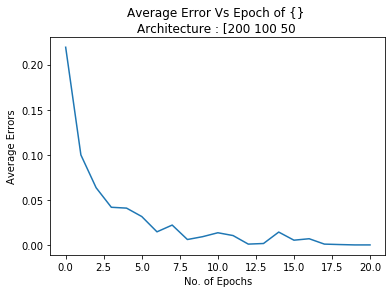

Training Accuracy: 1.0


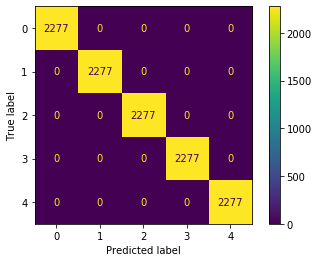

Validation Accuracy: 0.9894598155467721


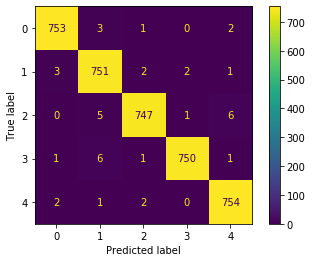

512 128 32
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 471,877
Trainable params: 471,877
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.21075583994388

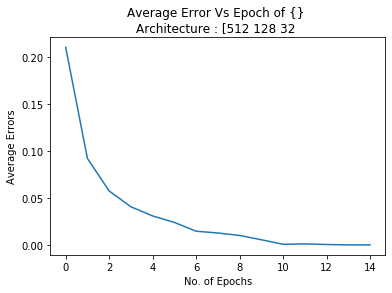

Training Accuracy: 1.0


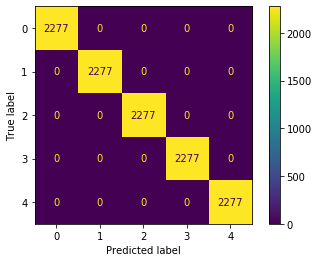

Validation Accuracy: 0.9905138339920949


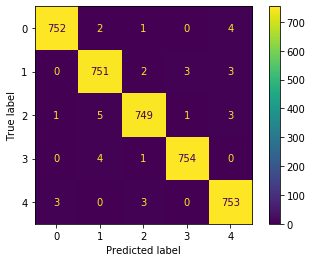

300 400 100
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 dense_9 (Dense)             (None, 400)               120400    
                                                                 
 dense_10 (Dense)            (None, 100)               40100     
                                                                 
 dense_11 (Dense)            (None, 5)                 505       
                                                                 
Total params: 396,505
Trainable params: 396,505
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2149290144443

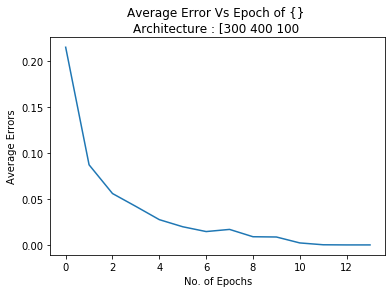

Training Accuracy: 1.0


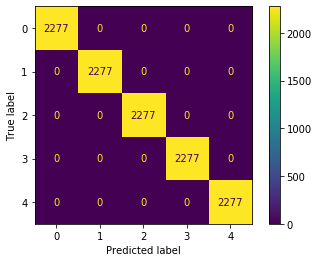

Validation Accuracy: 0.9894598155467721


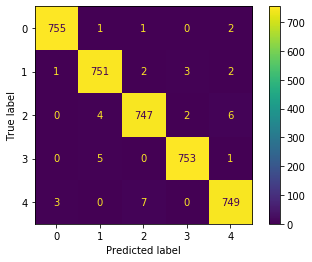

800 300 50
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 800)               628000    
                                                                 
 dense_13 (Dense)            (None, 300)               240300    
                                                                 
 dense_14 (Dense)            (None, 50)                15050     
                                                                 
 dense_15 (Dense)            (None, 5)                 255       
                                                                 
Total params: 883,605
Trainable params: 883,605
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.20647948980331

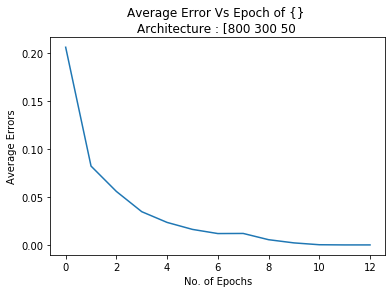

Training Accuracy: 1.0


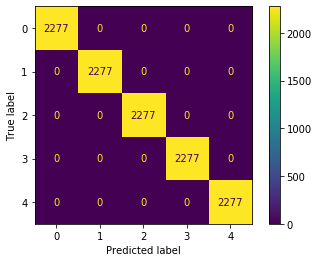

Validation Accuracy: 0.9907773386034255


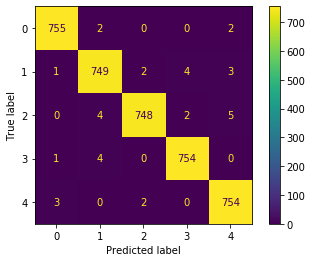

400 150 60
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 400)               314000    
                                                                 
 dense_17 (Dense)            (None, 150)               60150     
                                                                 
 dense_18 (Dense)            (None, 60)                9060      
                                                                 
 dense_19 (Dense)            (None, 5)                 305       
                                                                 
Total params: 383,515
Trainable params: 383,515
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.21255432069301

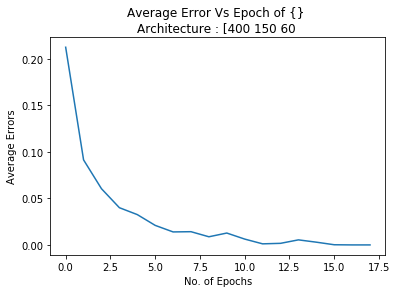

Training Accuracy: 1.0


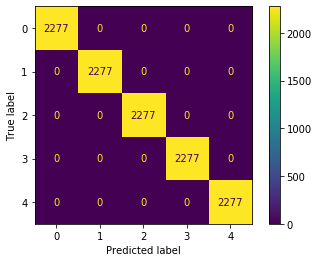

Validation Accuracy: 0.9910408432147563


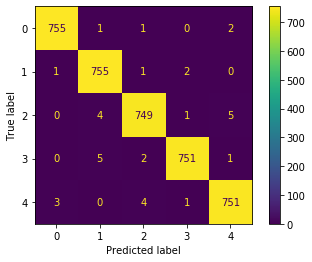

   layer 1 neurons  layer 2 neurons  layer 3 neurons  Training Accuracy  \
0              200              100               50                1.0   
1              512              128               32                1.0   
2              300              400              100                1.0   
3              800              300               50                1.0   
4              400              150               60                1.0   

   Validation Accuracy  
0             0.989460  
1             0.990514  
2             0.989460  
3             0.990777  
4             0.991041  


In [8]:
call_fcnn(optimizers[0],keras_optimizers[0],batch[0])

200 100 50
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 200)               157000    
                                                                 
 dense_21 (Dense)            (None, 100)               20100     
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 dense_23 (Dense)            (None, 5)                 255       
                                                                 
Total params: 182,405
Trainable params: 182,405
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 1.69648504257202

Epoch 171 done | loss: 0.5733199715614319
Epoch 172 done | loss: 0.5695655345916748
Epoch 173 done | loss: 0.5658568143844604
Epoch 174 done | loss: 0.562193751335144
Epoch 175 done | loss: 0.5585737824440002
Epoch 176 done | loss: 0.5549975037574768
Epoch 177 done | loss: 0.5514634847640991
Epoch 178 done | loss: 0.5479710698127747
Epoch 179 done | loss: 0.5445224642753601
Epoch 180 done | loss: 0.5411171913146973
Epoch 181 done | loss: 0.537753701210022
Epoch 182 done | loss: 0.5344312787055969
Epoch 183 done | loss: 0.5311492085456848
Epoch 184 done | loss: 0.5279075503349304
Epoch 185 done | loss: 0.5247046947479248
Epoch 186 done | loss: 0.5215423703193665
Epoch 187 done | loss: 0.5184239745140076
Epoch 188 done | loss: 0.5153475999832153
Epoch 189 done | loss: 0.5123117566108704
Epoch 190 done | loss: 0.5093141794204712
Epoch 191 done | loss: 0.5063533782958984
Epoch 192 done | loss: 0.5034295320510864
Epoch 193 done | loss: 0.5005449652671814
Epoch 194 done | loss: 0.49769824743

Epoch 368 done | loss: 0.2815997004508972
Epoch 369 done | loss: 0.28109613060951233
Epoch 370 done | loss: 0.28059595823287964
Epoch 371 done | loss: 0.28009912371635437
Epoch 372 done | loss: 0.27960559725761414
Epoch 373 done | loss: 0.27911558747291565
Epoch 374 done | loss: 0.2786290645599365
Epoch 375 done | loss: 0.2781459391117096
Epoch 376 done | loss: 0.277665913105011
Epoch 377 done | loss: 0.2771894931793213
Epoch 378 done | loss: 0.27671611309051514
Epoch 379 done | loss: 0.27624571323394775
Epoch 380 done | loss: 0.275778591632843
Epoch 381 done | loss: 0.2753145396709442
Epoch 382 done | loss: 0.2748536765575409
Epoch 383 done | loss: 0.2743958830833435
Epoch 384 done | loss: 0.2739409804344177
Epoch 385 done | loss: 0.273488849401474
Epoch 386 done | loss: 0.2730392813682556
Epoch 387 done | loss: 0.27259260416030884
Epoch 388 done | loss: 0.2721487879753113
Epoch 389 done | loss: 0.2717076539993286
Epoch 390 done | loss: 0.27126941084861755
Epoch 391 done | loss: 0.270

Epoch 561 done | loss: 0.22158567607402802
Epoch 562 done | loss: 0.22138988971710205
Epoch 563 done | loss: 0.22119486331939697
Epoch 564 done | loss: 0.22100064158439636
Epoch 565 done | loss: 0.22080709040164948
Epoch 566 done | loss: 0.2206142544746399
Epoch 567 done | loss: 0.22042216360569
Epoch 568 done | loss: 0.22023077309131622
Epoch 569 done | loss: 0.22004006803035736
Epoch 570 done | loss: 0.21985016763210297
Epoch 571 done | loss: 0.21966102719306946
Epoch 572 done | loss: 0.21947254240512848
Epoch 573 done | loss: 0.21928463876247406
Epoch 574 done | loss: 0.219097301363945
Epoch 575 done | loss: 0.21891048550605774
Epoch 576 done | loss: 0.21872441470623016
Epoch 577 done | loss: 0.21853898465633392
Epoch 578 done | loss: 0.21835431456565857
Epoch 579 done | loss: 0.21817024052143097
Epoch 580 done | loss: 0.2179868072271347
Epoch 581 done | loss: 0.21780376136302948
Epoch 582 done | loss: 0.2176213562488556
Epoch 583 done | loss: 0.21743948757648468
Epoch 584 done | lo

Epoch 755 done | loss: 0.1928550899028778
Epoch 756 done | loss: 0.1927417814731598
Epoch 757 done | loss: 0.1926286518573761
Epoch 758 done | loss: 0.19251587986946106
Epoch 759 done | loss: 0.19240321218967438
Epoch 760 done | loss: 0.19229085743427277
Epoch 761 done | loss: 0.19217880070209503
Epoch 762 done | loss: 0.19206689298152924
Epoch 763 done | loss: 0.19195525348186493
Epoch 764 done | loss: 0.19184383749961853
Epoch 765 done | loss: 0.191732719540596
Epoch 766 done | loss: 0.1916218101978302
Epoch 767 done | loss: 0.1915111094713211
Epoch 768 done | loss: 0.1914006769657135
Epoch 769 done | loss: 0.1912904530763626
Epoch 770 done | loss: 0.1911805272102356
Epoch 771 done | loss: 0.1910708248615265
Epoch 772 done | loss: 0.1909613311290741
Epoch 773 done | loss: 0.19085204601287842
Epoch 774 done | loss: 0.19074293971061707
Epoch 775 done | loss: 0.19063401222229004
Epoch 776 done | loss: 0.19052532315254211
Epoch 777 done | loss: 0.19041690230369568
Epoch 778 done | loss: 

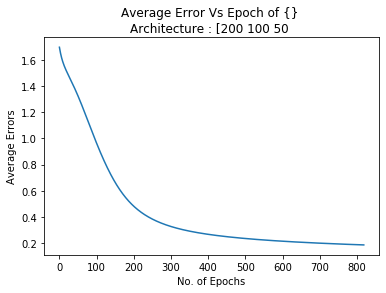

Training Accuracy: 0.9458058849363197


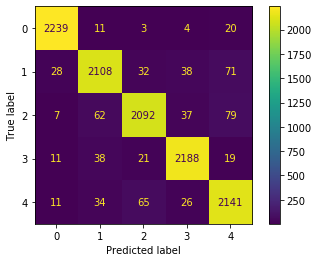

Validation Accuracy: 0.9449275362318841


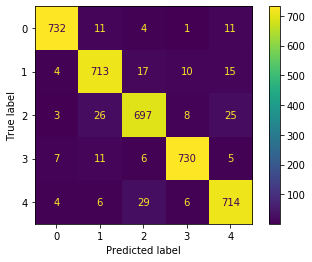

512 128 32
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 128)               65664     
                                                                 
 dense_26 (Dense)            (None, 32)                4128      
                                                                 
 dense_27 (Dense)            (None, 5)                 165       
                                                                 
Total params: 471,877
Trainable params: 471,877
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 1.62484633922576

Epoch 171 done | loss: 0.45366546511650085
Epoch 172 done | loss: 0.451313316822052
Epoch 173 done | loss: 0.4489928185939789
Epoch 174 done | loss: 0.4467031955718994
Epoch 175 done | loss: 0.44444331526756287
Epoch 176 done | loss: 0.4422118663787842
Epoch 177 done | loss: 0.44000929594039917
Epoch 178 done | loss: 0.4378359019756317
Epoch 179 done | loss: 0.43569082021713257
Epoch 180 done | loss: 0.43357324600219727
Epoch 181 done | loss: 0.43148383498191833
Epoch 182 done | loss: 0.42942094802856445
Epoch 183 done | loss: 0.42738407850265503
Epoch 184 done | loss: 0.42537304759025574
Epoch 185 done | loss: 0.42338666319847107
Epoch 186 done | loss: 0.4214250147342682
Epoch 187 done | loss: 0.4194871485233307
Epoch 188 done | loss: 0.4175727665424347
Epoch 189 done | loss: 0.41568177938461304
Epoch 190 done | loss: 0.41381382942199707
Epoch 191 done | loss: 0.4119681119918823
Epoch 192 done | loss: 0.410145103931427
Epoch 193 done | loss: 0.4083441495895386
Epoch 194 done | loss: 0

Epoch 365 done | loss: 0.2601076066493988
Epoch 366 done | loss: 0.2596937119960785
Epoch 367 done | loss: 0.2592822015285492
Epoch 368 done | loss: 0.2588730752468109
Epoch 369 done | loss: 0.2584661543369293
Epoch 370 done | loss: 0.2580614686012268
Epoch 371 done | loss: 0.25765904784202576
Epoch 372 done | loss: 0.25725898146629333
Epoch 373 done | loss: 0.2568613588809967
Epoch 374 done | loss: 0.2564660608768463
Epoch 375 done | loss: 0.256072998046875
Epoch 376 done | loss: 0.2556822597980499
Epoch 377 done | loss: 0.2552935779094696
Epoch 378 done | loss: 0.25490716099739075
Epoch 379 done | loss: 0.2545228600502014
Epoch 380 done | loss: 0.25414085388183594
Epoch 381 done | loss: 0.2537609040737152
Epoch 382 done | loss: 0.253383070230484
Epoch 383 done | loss: 0.2530074715614319
Epoch 384 done | loss: 0.2526341378688812
Epoch 385 done | loss: 0.25226283073425293
Epoch 386 done | loss: 0.25189363956451416
Epoch 387 done | loss: 0.25152668356895447
Epoch 388 done | loss: 0.2511

Epoch 559 done | loss: 0.20821170508861542
Epoch 560 done | loss: 0.20803600549697876
Epoch 561 done | loss: 0.20786087214946747
Epoch 562 done | loss: 0.20768631994724274
Epoch 563 done | loss: 0.20751245319843292
Epoch 564 done | loss: 0.2073391228914261
Epoch 565 done | loss: 0.2071664184331894
Epoch 566 done | loss: 0.20699423551559448
Epoch 567 done | loss: 0.20682264864444733
Epoch 568 done | loss: 0.20665152370929718
Epoch 569 done | loss: 0.20648090541362762
Epoch 570 done | loss: 0.20631085336208344
Epoch 571 done | loss: 0.20614132285118103
Epoch 572 done | loss: 0.20597238838672638
Epoch 573 done | loss: 0.2058040052652359
Epoch 574 done | loss: 0.20563609898090363
Epoch 575 done | loss: 0.2054687887430191
Epoch 576 done | loss: 0.20530205965042114
Epoch 577 done | loss: 0.20513585209846497
Epoch 578 done | loss: 0.20497018098831177
Epoch 579 done | loss: 0.20480506122112274
Epoch 580 done | loss: 0.2046404331922531
Epoch 581 done | loss: 0.20447631180286407
Epoch 582 done |

Epoch 751 done | loss: 0.18218673765659332
Epoch 752 done | loss: 0.1820804923772812
Epoch 753 done | loss: 0.18197448551654816
Epoch 754 done | loss: 0.18186870217323303
Epoch 755 done | loss: 0.1817631721496582
Epoch 756 done | loss: 0.18165788054466248
Epoch 757 done | loss: 0.18155279755592346
Epoch 758 done | loss: 0.18144795298576355
Epoch 759 done | loss: 0.18134328722953796
Epoch 760 done | loss: 0.1812388002872467
Epoch 761 done | loss: 0.18113461136817932
Epoch 762 done | loss: 0.1810305416584015
Epoch 763 done | loss: 0.1809266060590744
Epoch 764 done | loss: 0.18082287907600403
Epoch 765 done | loss: 0.18071943521499634
Epoch 766 done | loss: 0.18061615526676178
Epoch 767 done | loss: 0.18051309883594513
Epoch 768 done | loss: 0.1804102510213852
Epoch 769 done | loss: 0.18030758202075958
Epoch 770 done | loss: 0.18020512163639069
Epoch 771 done | loss: 0.1801028698682785
Epoch 772 done | loss: 0.18000079691410065
Epoch 773 done | loss: 0.17989897727966309
Epoch 774 done | l

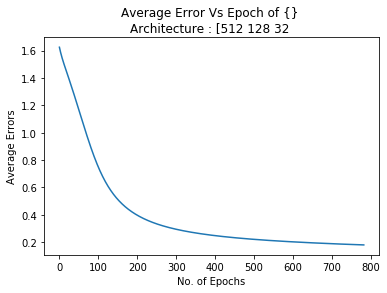

Training Accuracy: 0.9494949494949495


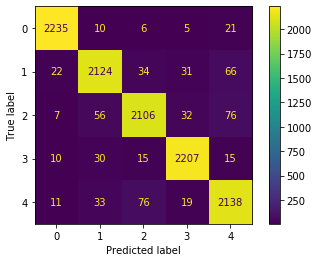

Validation Accuracy: 0.9444005270092226


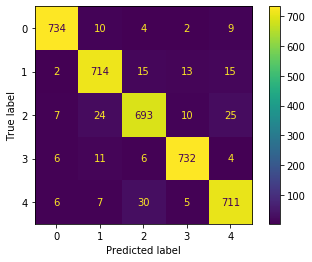

300 400 100
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 300)               235500    
                                                                 
 dense_29 (Dense)            (None, 400)               120400    
                                                                 
 dense_30 (Dense)            (None, 100)               40100     
                                                                 
 dense_31 (Dense)            (None, 5)                 505       
                                                                 
Total params: 396,505
Trainable params: 396,505
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 1.6983114480972

Epoch 172 done | loss: 0.5009821653366089
Epoch 173 done | loss: 0.4979623854160309
Epoch 174 done | loss: 0.4949864149093628
Epoch 175 done | loss: 0.4920540750026703
Epoch 176 done | loss: 0.48916465044021606
Epoch 177 done | loss: 0.486316978931427
Epoch 178 done | loss: 0.4835115373134613
Epoch 179 done | loss: 0.480747789144516
Epoch 180 done | loss: 0.4780248999595642
Epoch 181 done | loss: 0.475340873003006
Epoch 182 done | loss: 0.47269541025161743
Epoch 183 done | loss: 0.47008854150772095
Epoch 184 done | loss: 0.4675188660621643
Epoch 185 done | loss: 0.46498510241508484
Epoch 186 done | loss: 0.4624873995780945
Epoch 187 done | loss: 0.4600249230861664
Epoch 188 done | loss: 0.4575973451137543
Epoch 189 done | loss: 0.45520421862602234
Epoch 190 done | loss: 0.45284536480903625
Epoch 191 done | loss: 0.45051950216293335
Epoch 192 done | loss: 0.44822555780410767
Epoch 193 done | loss: 0.4459631145000458
Epoch 194 done | loss: 0.44373154640197754
Epoch 195 done | loss: 0.441

Epoch 366 done | loss: 0.2711540460586548
Epoch 367 done | loss: 0.27070021629333496
Epoch 368 done | loss: 0.2702491581439972
Epoch 369 done | loss: 0.2698010206222534
Epoch 370 done | loss: 0.2693556547164917
Epoch 371 done | loss: 0.2689128816127777
Epoch 372 done | loss: 0.268472820520401
Epoch 373 done | loss: 0.2680354416370392
Epoch 374 done | loss: 0.26760074496269226
Epoch 375 done | loss: 0.26716864109039307
Epoch 376 done | loss: 0.266739159822464
Epoch 377 done | loss: 0.2663123309612274
Epoch 378 done | loss: 0.2658880650997162
Epoch 379 done | loss: 0.26546648144721985
Epoch 380 done | loss: 0.2650473117828369
Epoch 381 done | loss: 0.26463064551353455
Epoch 382 done | loss: 0.26421645283699036
Epoch 383 done | loss: 0.2638046443462372
Epoch 384 done | loss: 0.26339519023895264
Epoch 385 done | loss: 0.26298826932907104
Epoch 386 done | loss: 0.26258376240730286
Epoch 387 done | loss: 0.26218146085739136
Epoch 388 done | loss: 0.26178160309791565
Epoch 389 done | loss: 0.

Epoch 560 done | loss: 0.21555757522583008
Epoch 561 done | loss: 0.21537363529205322
Epoch 562 done | loss: 0.21519029140472412
Epoch 563 done | loss: 0.21500758826732635
Epoch 564 done | loss: 0.21482545137405396
Epoch 565 done | loss: 0.21464401483535767
Epoch 566 done | loss: 0.21446320414543152
Epoch 567 done | loss: 0.21428298950195312
Epoch 568 done | loss: 0.21410337090492249
Epoch 569 done | loss: 0.2139243632555008
Epoch 570 done | loss: 0.21374590694904327
Epoch 571 done | loss: 0.2135680615901947
Epoch 572 done | loss: 0.21339082717895508
Epoch 573 done | loss: 0.2132142186164856
Epoch 574 done | loss: 0.21303817629814148
Epoch 575 done | loss: 0.21286270022392273
Epoch 576 done | loss: 0.2126878947019577
Epoch 577 done | loss: 0.21251361072063446
Epoch 578 done | loss: 0.21233993768692017
Epoch 579 done | loss: 0.21216684579849243
Epoch 580 done | loss: 0.2119942605495453
Epoch 581 done | loss: 0.2118222415447235
Epoch 582 done | loss: 0.21165068447589874
Epoch 583 done | 

Epoch 754 done | loss: 0.18840481340885162
Epoch 755 done | loss: 0.1882968544960022
Epoch 756 done | loss: 0.18818916380405426
Epoch 757 done | loss: 0.1880817413330078
Epoch 758 done | loss: 0.1879744529724121
Epoch 759 done | loss: 0.1878674477338791
Epoch 760 done | loss: 0.18776068091392517
Epoch 761 done | loss: 0.18765413761138916
Epoch 762 done | loss: 0.18754781782627106
Epoch 763 done | loss: 0.18744172155857086
Epoch 764 done | loss: 0.18733586370944977
Epoch 765 done | loss: 0.1872301697731018
Epoch 766 done | loss: 0.18712477385997772
Epoch 767 done | loss: 0.18701957166194916
Epoch 768 done | loss: 0.1869145929813385
Epoch 769 done | loss: 0.18680983781814575
Epoch 770 done | loss: 0.18670527637004852
Epoch 771 done | loss: 0.18660098314285278
Epoch 772 done | loss: 0.18649692833423615
Epoch 773 done | loss: 0.18639309704303741
Epoch 774 done | loss: 0.18628951907157898
Epoch 775 done | loss: 0.18618616461753845
Epoch 776 done | loss: 0.18608301877975464
Epoch 777 done | 

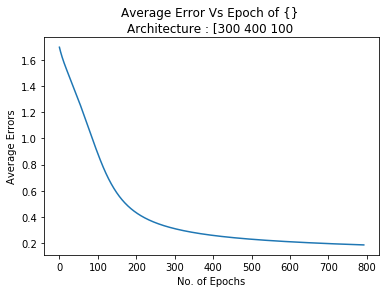

Training Accuracy: 0.9477382520860782


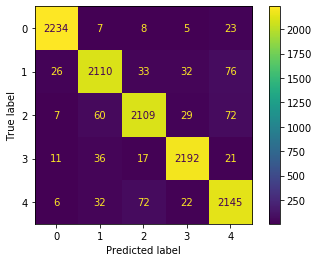

Validation Accuracy: 0.9459815546772069


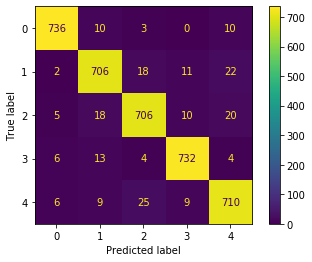

800 300 50
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 800)               628000    
                                                                 
 dense_33 (Dense)            (None, 300)               240300    
                                                                 
 dense_34 (Dense)            (None, 50)                15050     
                                                                 
 dense_35 (Dense)            (None, 5)                 255       
                                                                 
Total params: 883,605
Trainable params: 883,605
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 1.63232111930847

Epoch 170 done | loss: 0.32740989327430725
Epoch 171 done | loss: 0.32615622878074646
Epoch 172 done | loss: 0.3249191641807556
Epoch 173 done | loss: 0.3236984312534332
Epoch 174 done | loss: 0.3224935233592987
Epoch 175 done | loss: 0.3213039040565491
Epoch 176 done | loss: 0.3201296329498291
Epoch 177 done | loss: 0.3189706802368164
Epoch 178 done | loss: 0.3178263306617737
Epoch 179 done | loss: 0.31669625639915466
Epoch 180 done | loss: 0.31558042764663696
Epoch 181 done | loss: 0.31447821855545044
Epoch 182 done | loss: 0.31338950991630554
Epoch 183 done | loss: 0.3123140335083008
Epoch 184 done | loss: 0.31125131249427795
Epoch 185 done | loss: 0.31020113825798035
Epoch 186 done | loss: 0.30916306376457214
Epoch 187 done | loss: 0.3081373870372772
Epoch 188 done | loss: 0.30712366104125977
Epoch 189 done | loss: 0.3061214089393616
Epoch 190 done | loss: 0.30513063073158264
Epoch 191 done | loss: 0.30415117740631104
Epoch 192 done | loss: 0.3031831681728363
Epoch 193 done | loss:

Epoch 363 done | loss: 0.21792083978652954
Epoch 364 done | loss: 0.21765148639678955
Epoch 365 done | loss: 0.21738342940807343
Epoch 366 done | loss: 0.2171165645122528
Epoch 367 done | loss: 0.21685095131397247
Epoch 368 done | loss: 0.21658654510974884
Epoch 369 done | loss: 0.21632343530654907
Epoch 370 done | loss: 0.2160615175962448
Epoch 371 done | loss: 0.2158009111881256
Epoch 372 done | loss: 0.2155415564775467
Epoch 373 done | loss: 0.2152833789587021
Epoch 374 done | loss: 0.21502640843391418
Epoch 375 done | loss: 0.21477074921131134
Epoch 376 done | loss: 0.2145165205001831
Epoch 377 done | loss: 0.21426351368427277
Epoch 378 done | loss: 0.21401169896125793
Epoch 379 done | loss: 0.2137610763311386
Epoch 380 done | loss: 0.21351169049739838
Epoch 381 done | loss: 0.2132634073495865
Epoch 382 done | loss: 0.21301628649234772
Epoch 383 done | loss: 0.21277034282684326
Epoch 384 done | loss: 0.21252556145191193
Epoch 385 done | loss: 0.21228186786174774
Epoch 386 done | lo

Epoch 555 done | loss: 0.18188969790935516
Epoch 556 done | loss: 0.18175500631332397
Epoch 557 done | loss: 0.1816207468509674
Epoch 558 done | loss: 0.1814868301153183
Epoch 559 done | loss: 0.18135318160057068
Epoch 560 done | loss: 0.1812199205160141
Epoch 561 done | loss: 0.18108710646629333
Epoch 562 done | loss: 0.18095459043979645
Epoch 563 done | loss: 0.1808224469423294
Epoch 564 done | loss: 0.18069064617156982
Epoch 565 done | loss: 0.1805592030286789
Epoch 566 done | loss: 0.1804281324148178
Epoch 567 done | loss: 0.180297389626503
Epoch 568 done | loss: 0.18016700446605682
Epoch 569 done | loss: 0.1800369769334793
Epoch 570 done | loss: 0.17990723252296448
Epoch 571 done | loss: 0.17977787554264069
Epoch 572 done | loss: 0.1796487718820572
Epoch 573 done | loss: 0.17951998114585876
Epoch 574 done | loss: 0.179391548037529
Epoch 575 done | loss: 0.1792634278535843
Epoch 576 done | loss: 0.17913568019866943
Epoch 577 done | loss: 0.17900826036930084
Epoch 578 done | loss: 0

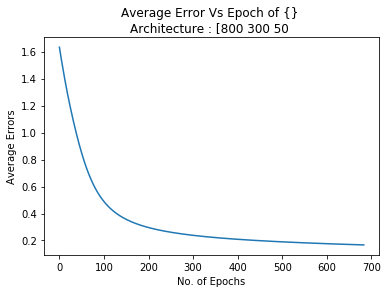

Training Accuracy: 0.9520421607378129


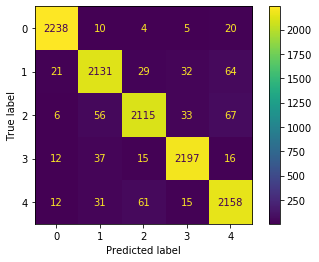

Validation Accuracy: 0.950197628458498


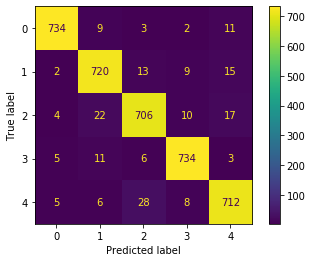

400 150 60
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 400)               314000    
                                                                 
 dense_37 (Dense)            (None, 150)               60150     
                                                                 
 dense_38 (Dense)            (None, 60)                9060      
                                                                 
 dense_39 (Dense)            (None, 5)                 305       
                                                                 
Total params: 383,515
Trainable params: 383,515
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 1.61312174797058

Epoch 172 done | loss: 0.42205119132995605
Epoch 173 done | loss: 0.419944703578949
Epoch 174 done | loss: 0.41786855459213257
Epoch 175 done | loss: 0.415822297334671
Epoch 176 done | loss: 0.41380491852760315
Epoch 177 done | loss: 0.41181594133377075
Epoch 178 done | loss: 0.4098545014858246
Epoch 179 done | loss: 0.4079204499721527
Epoch 180 done | loss: 0.40601256489753723
Epoch 181 done | loss: 0.404131144285202
Epoch 182 done | loss: 0.40227559208869934
Epoch 183 done | loss: 0.40044522285461426
Epoch 184 done | loss: 0.39863917231559753
Epoch 185 done | loss: 0.39685776829719543
Epoch 186 done | loss: 0.39509978890419006
Epoch 187 done | loss: 0.39336520433425903
Epoch 188 done | loss: 0.39165353775024414
Epoch 189 done | loss: 0.38996365666389465
Epoch 190 done | loss: 0.3882952332496643
Epoch 191 done | loss: 0.38664859533309937
Epoch 192 done | loss: 0.385022908449173
Epoch 193 done | loss: 0.3834189474582672
Epoch 194 done | loss: 0.3818356394767761
Epoch 195 done | loss: 0

Epoch 366 done | loss: 0.25387829542160034
Epoch 367 done | loss: 0.2535194456577301
Epoch 368 done | loss: 0.2531627118587494
Epoch 369 done | loss: 0.25280800461769104
Epoch 370 done | loss: 0.25245529413223267
Epoch 371 done | loss: 0.25210461020469666
Epoch 372 done | loss: 0.25175589323043823
Epoch 373 done | loss: 0.2514093518257141
Epoch 374 done | loss: 0.25106483697891235
Epoch 375 done | loss: 0.2507222890853882
Epoch 376 done | loss: 0.25038161873817444
Epoch 377 done | loss: 0.2500429153442383
Epoch 378 done | loss: 0.2497059553861618
Epoch 379 done | loss: 0.24937087297439575
Epoch 380 done | loss: 0.24903763830661774
Epoch 381 done | loss: 0.24870619177818298
Epoch 382 done | loss: 0.24837659299373627
Epoch 383 done | loss: 0.2480485886335373
Epoch 384 done | loss: 0.24772238731384277
Epoch 385 done | loss: 0.24739797413349152
Epoch 386 done | loss: 0.24707545340061188
Epoch 387 done | loss: 0.2467544823884964
Epoch 388 done | loss: 0.2464352250099182
Epoch 389 done | los

Epoch 560 done | loss: 0.20797590911388397
Epoch 561 done | loss: 0.20781518518924713
Epoch 562 done | loss: 0.2076549232006073
Epoch 563 done | loss: 0.20749510824680328
Epoch 564 done | loss: 0.20733581483364105
Epoch 565 done | loss: 0.20717698335647583
Epoch 566 done | loss: 0.2070186585187912
Epoch 567 done | loss: 0.20686081051826477
Epoch 568 done | loss: 0.20670336484909058
Epoch 569 done | loss: 0.20654644072055817
Epoch 570 done | loss: 0.20638994872570038
Epoch 571 done | loss: 0.2062339186668396
Epoch 572 done | loss: 0.20607836544513702
Epoch 573 done | loss: 0.20592327415943146
Epoch 574 done | loss: 0.2057686597108841
Epoch 575 done | loss: 0.2056146115064621
Epoch 576 done | loss: 0.20546098053455353
Epoch 577 done | loss: 0.20530767738819122
Epoch 578 done | loss: 0.20515480637550354
Epoch 579 done | loss: 0.2050022929906845
Epoch 580 done | loss: 0.20485025644302368
Epoch 581 done | loss: 0.20469869673252106
Epoch 582 done | loss: 0.20454759895801544
Epoch 583 done | 

Epoch 752 done | loss: 0.18365378677845
Epoch 753 done | loss: 0.18355251848697662
Epoch 754 done | loss: 0.18345139920711517
Epoch 755 done | loss: 0.18335050344467163
Epoch 756 done | loss: 0.18324978649616241
Epoch 757 done | loss: 0.18314926326274872
Epoch 758 done | loss: 0.18304894864559174
Epoch 759 done | loss: 0.1829487830400467
Epoch 760 done | loss: 0.18284887075424194
760
761 761


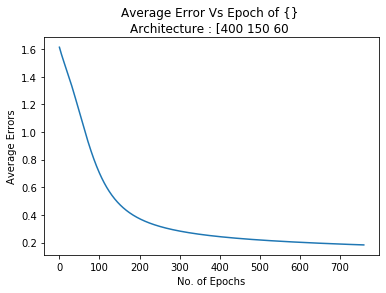

Training Accuracy: 0.9463328941589811


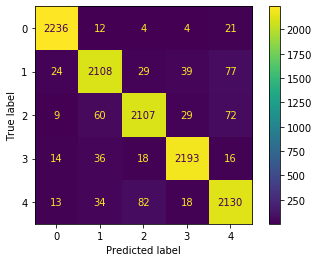

Validation Accuracy: 0.9454545454545454


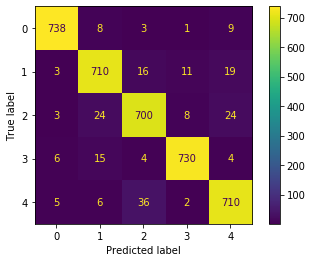

   layer 1 neurons  layer 2 neurons  layer 3 neurons  Training Accuracy  \
0              200              100               50           0.945806   
1              512              128               32           0.949495   
2              300              400              100           0.947738   
3              800              300               50           0.952042   
4              400              150               60           0.946333   

   Validation Accuracy  
0             0.944928  
1             0.944401  
2             0.945982  
3             0.950198  
4             0.945455  


In [9]:
call_fcnn(optimizers[1],keras_optimizers[1],batch[1])

200 100 50
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 200)               157000    
                                                                 
 dense_41 (Dense)            (None, 100)               20100     
                                                                 
 dense_42 (Dense)            (None, 50)                5050      
                                                                 
 dense_43 (Dense)            (None, 5)                 255       
                                                                 
Total params: 182,405
Trainable params: 182,405
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2838858962059

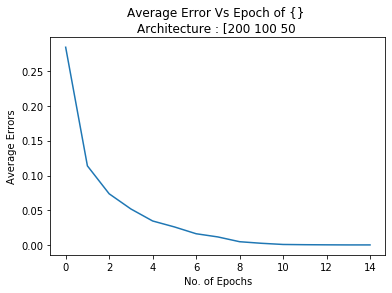

Training Accuracy: 1.0


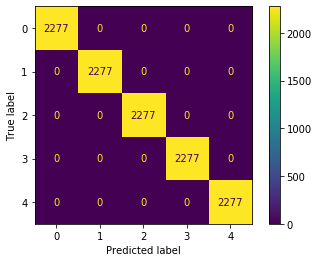

Validation Accuracy: 0.9865612648221344


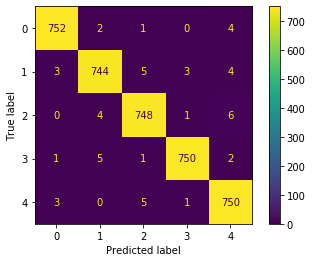

512 128 32
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dense_45 (Dense)            (None, 128)               65664     
                                                                 
 dense_46 (Dense)            (None, 32)                4128      
                                                                 
 dense_47 (Dense)            (None, 5)                 165       
                                                                 
Total params: 471,877
Trainable params: 471,877
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2556042969226

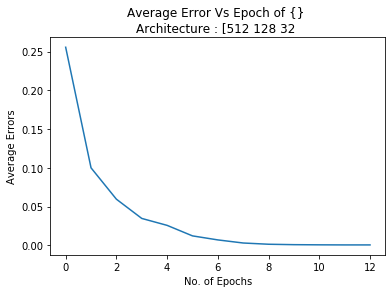

Training Accuracy: 1.0


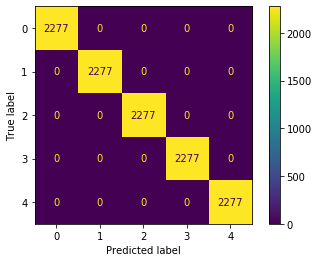

Validation Accuracy: 0.9873517786561264


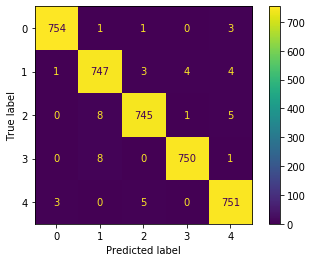

300 400 100
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 300)               235500    
                                                                 
 dense_49 (Dense)            (None, 400)               120400    
                                                                 
 dense_50 (Dense)            (None, 100)               40100     
                                                                 
 dense_51 (Dense)            (None, 5)                 505       
                                                                 
Total params: 396,505
Trainable params: 396,505
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.272993892431

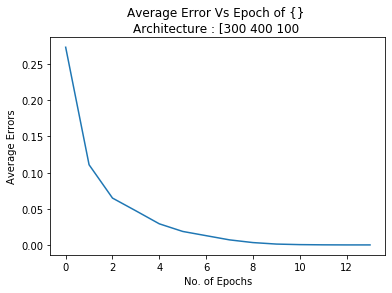

Training Accuracy: 1.0


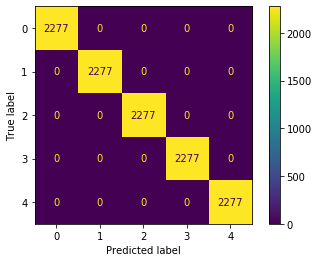

Validation Accuracy: 0.9891963109354414


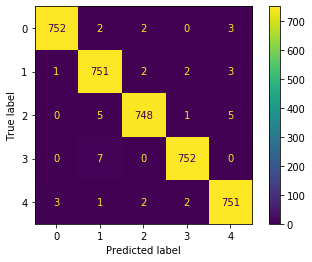

800 300 50
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 800)               628000    
                                                                 
 dense_53 (Dense)            (None, 300)               240300    
                                                                 
 dense_54 (Dense)            (None, 50)                15050     
                                                                 
 dense_55 (Dense)            (None, 5)                 255       
                                                                 
Total params: 883,605
Trainable params: 883,605
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2548501491546

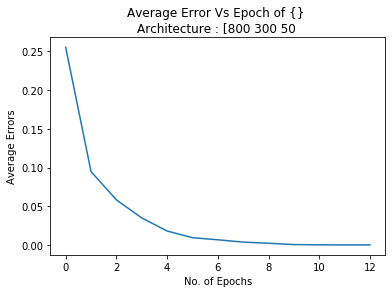

Training Accuracy: 1.0


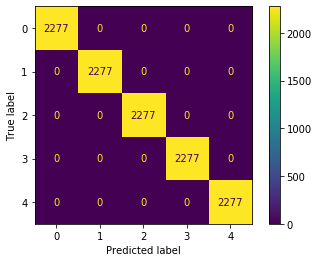

Validation Accuracy: 0.9899868247694334


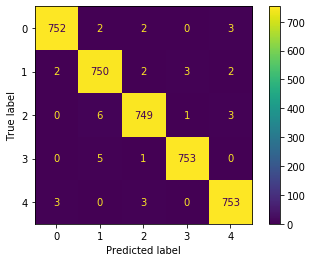

400 150 60
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 400)               314000    
                                                                 
 dense_57 (Dense)            (None, 150)               60150     
                                                                 
 dense_58 (Dense)            (None, 60)                9060      
                                                                 
 dense_59 (Dense)            (None, 5)                 305       
                                                                 
Total params: 383,515
Trainable params: 383,515
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2691506147384

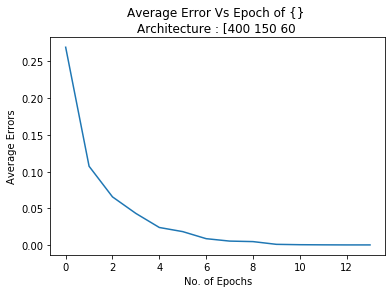

Training Accuracy: 1.0


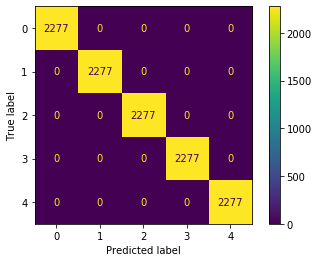

Validation Accuracy: 0.9881422924901185


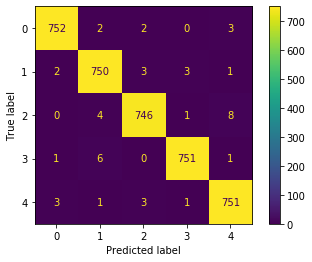

   layer 1 neurons  layer 2 neurons  layer 3 neurons  Training Accuracy  \
0              200              100               50                1.0   
1              512              128               32                1.0   
2              300              400              100                1.0   
3              800              300               50                1.0   
4              400              150               60                1.0   

   Validation Accuracy  
0             0.986561  
1             0.987352  
2             0.989196  
3             0.989987  
4             0.988142  


In [10]:
call_fcnn(optimizers[2],keras_optimizers[2],batch[2])

200 100 50
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_60 (Dense)            (None, 200)               157000    
                                                                 
 dense_61 (Dense)            (None, 100)               20100     
                                                                 
 dense_62 (Dense)            (None, 50)                5050      
                                                                 
 dense_63 (Dense)            (None, 5)                 255       
                                                                 
Total params: 182,405
Trainable params: 182,405
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2417711615562

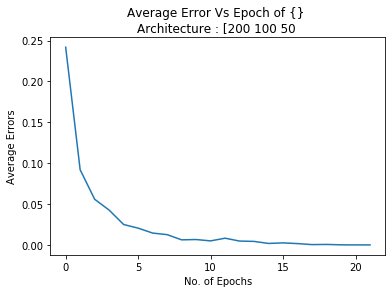

Training Accuracy: 1.0


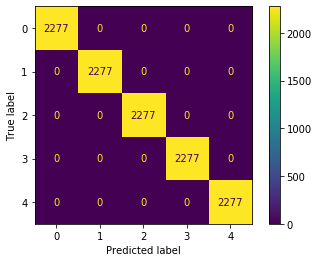

Validation Accuracy: 0.9897233201581027


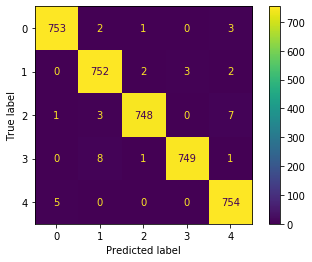

512 128 32
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_64 (Dense)            (None, 512)               401920    
                                                                 
 dense_65 (Dense)            (None, 128)               65664     
                                                                 
 dense_66 (Dense)            (None, 32)                4128      
                                                                 
 dense_67 (Dense)            (None, 5)                 165       
                                                                 
Total params: 471,877
Trainable params: 471,877
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2187894284725

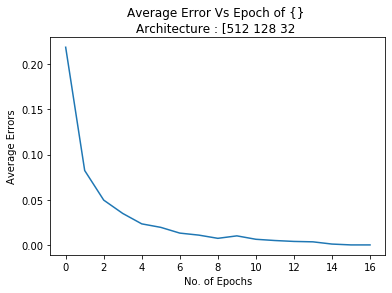

Training Accuracy: 1.0


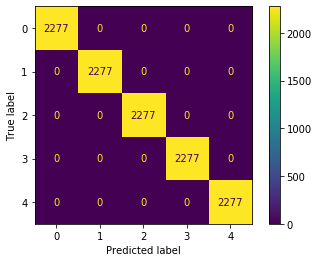

Validation Accuracy: 0.9902503293807642


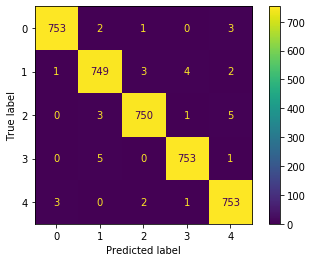

300 400 100
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_68 (Dense)            (None, 300)               235500    
                                                                 
 dense_69 (Dense)            (None, 400)               120400    
                                                                 
 dense_70 (Dense)            (None, 100)               40100     
                                                                 
 dense_71 (Dense)            (None, 5)                 505       
                                                                 
Total params: 396,505
Trainable params: 396,505
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.224532783031

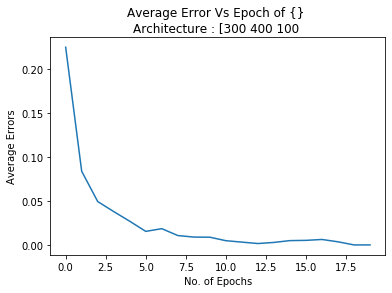

Training Accuracy: 1.0


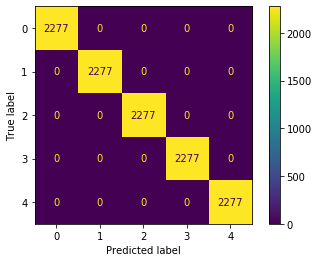

Validation Accuracy: 0.9870882740447958


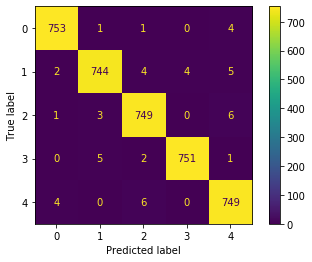

800 300 50
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_72 (Dense)            (None, 800)               628000    
                                                                 
 dense_73 (Dense)            (None, 300)               240300    
                                                                 
 dense_74 (Dense)            (None, 50)                15050     
                                                                 
 dense_75 (Dense)            (None, 5)                 255       
                                                                 
Total params: 883,605
Trainable params: 883,605
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2113980799913

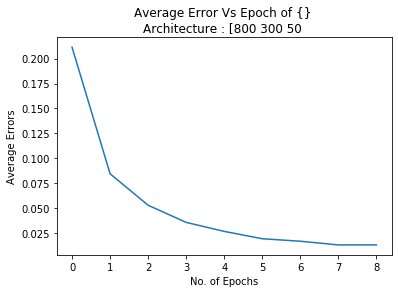

Training Accuracy: 0.996750109793588


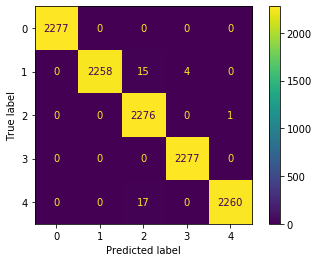

Validation Accuracy: 0.9828722002635046


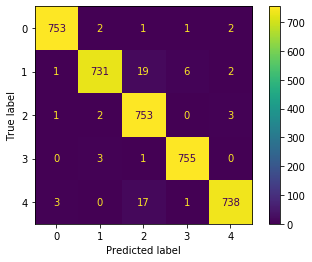

400 150 60
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_76 (Dense)            (None, 400)               314000    
                                                                 
 dense_77 (Dense)            (None, 150)               60150     
                                                                 
 dense_78 (Dense)            (None, 60)                9060      
                                                                 
 dense_79 (Dense)            (None, 5)                 305       
                                                                 
Total params: 383,515
Trainable params: 383,515
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2191598117351

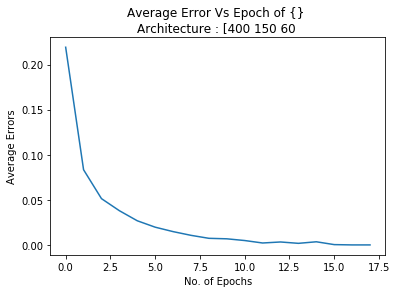

Training Accuracy: 1.0


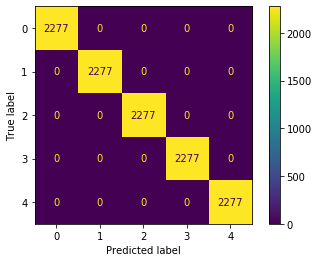

Validation Accuracy: 0.991304347826087


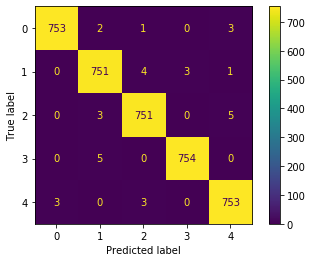

   layer 1 neurons  layer 2 neurons  layer 3 neurons  Training Accuracy  \
0              200              100               50            1.00000   
1              512              128               32            1.00000   
2              300              400              100            1.00000   
3              800              300               50            0.99675   
4              400              150               60            1.00000   

   Validation Accuracy  
0             0.989723  
1             0.990250  
2             0.987088  
3             0.982872  
4             0.991304  


In [11]:
call_fcnn(optimizers[3],keras_optimizers[3],batch[3])

200 100 50
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_80 (Dense)            (None, 200)               157000    
                                                                 
 dense_81 (Dense)            (None, 100)               20100     
                                                                 
 dense_82 (Dense)            (None, 50)                5050      
                                                                 
 dense_83 (Dense)            (None, 5)                 255       
                                                                 
Total params: 182,405
Trainable params: 182,405
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2363569736480

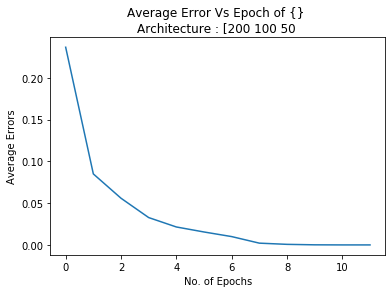

Training Accuracy: 1.0


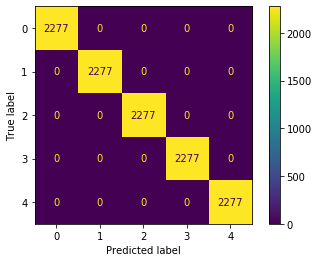

Validation Accuracy: 0.98866930171278


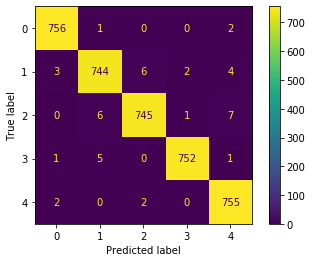

512 128 32
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_84 (Dense)            (None, 512)               401920    
                                                                 
 dense_85 (Dense)            (None, 128)               65664     
                                                                 
 dense_86 (Dense)            (None, 32)                4128      
                                                                 
 dense_87 (Dense)            (None, 5)                 165       
                                                                 
Total params: 471,877
Trainable params: 471,877
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.1839670091867

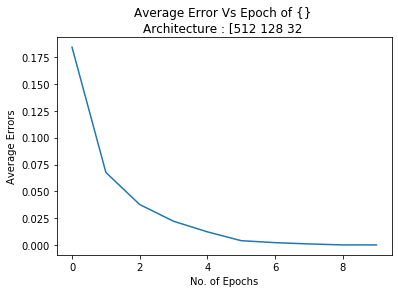

Training Accuracy: 1.0


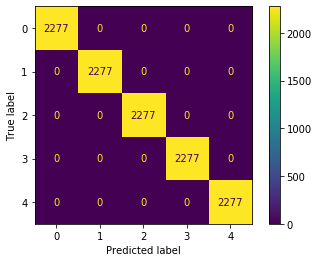

Validation Accuracy: 0.9889328063241106


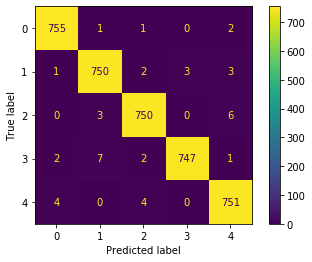

300 400 100
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_88 (Dense)            (None, 300)               235500    
                                                                 
 dense_89 (Dense)            (None, 400)               120400    
                                                                 
 dense_90 (Dense)            (None, 100)               40100     
                                                                 
 dense_91 (Dense)            (None, 5)                 505       
                                                                 
Total params: 396,505
Trainable params: 396,505
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.196887075901

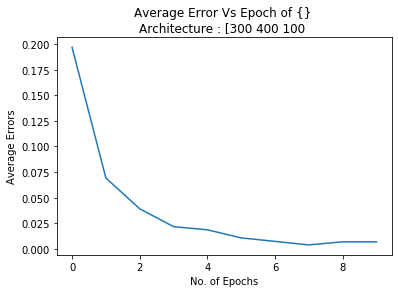

Training Accuracy: 0.9978041282389108


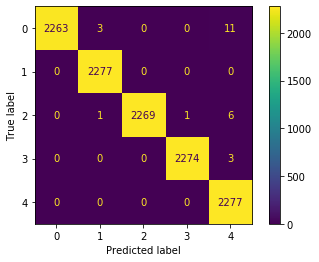

Validation Accuracy: 0.9836627140974967


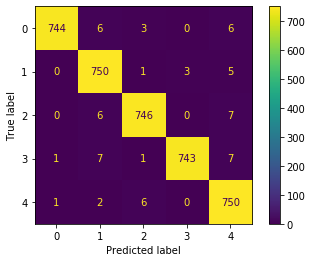

800 300 50
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_92 (Dense)            (None, 800)               628000    
                                                                 
 dense_93 (Dense)            (None, 300)               240300    
                                                                 
 dense_94 (Dense)            (None, 50)                15050     
                                                                 
 dense_95 (Dense)            (None, 5)                 255       
                                                                 
Total params: 883,605
Trainable params: 883,605
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.1866897940635

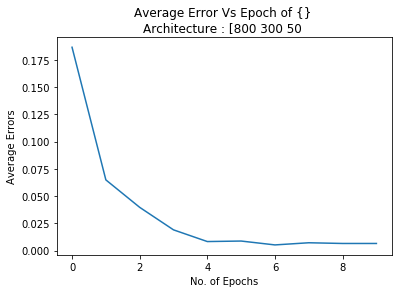

Training Accuracy: 0.9999121651295564


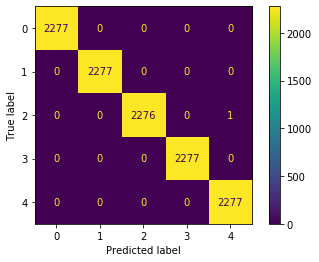

Validation Accuracy: 0.98866930171278


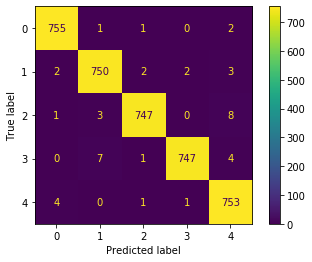

400 150 60
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_96 (Dense)            (None, 400)               314000    
                                                                 
 dense_97 (Dense)            (None, 150)               60150     
                                                                 
 dense_98 (Dense)            (None, 60)                9060      
                                                                 
 dense_99 (Dense)            (None, 5)                 305       
                                                                 
Total params: 383,515
Trainable params: 383,515
Non-trainable params: 0
_________________________________________________________________
Epoch 0 done | loss: 0.2009142637252

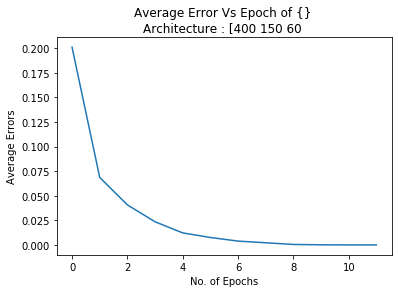

Training Accuracy: 1.0


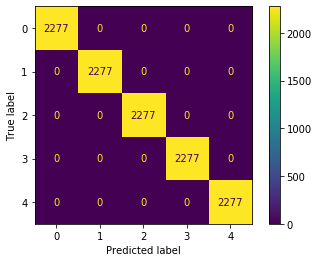

Validation Accuracy: 0.9884057971014493


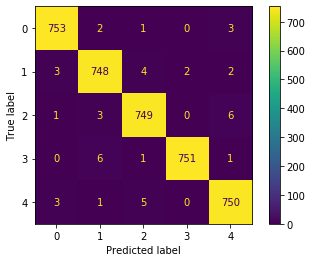

   layer 1 neurons  layer 2 neurons  layer 3 neurons  Training Accuracy  \
0              200              100               50           1.000000   
1              512              128               32           1.000000   
2              300              400              100           0.997804   
3              800              300               50           0.999912   
4              400              150               60           1.000000   

   Validation Accuracy  
0             0.988669  
1             0.988933  
2             0.983663  
3             0.988669  
4             0.988406  


In [12]:
call_fcnn(optimizers[4],keras_optimizers[4],batch[4])

In [13]:
best_arch

{'SGD': <data.fcnn at 0x7f03ac018860>,
 'VGD': <data.fcnn at 0x7f03abf98d68>,
 'NAG': <data.fcnn at 0x7f038800ef98>,
 'RMSProp': <data.fcnn at 0x7f0379230358>,
 'ADM': <data.fcnn at 0x7f037907fef0>}

In [14]:
df = pd.DataFrame(
    {"layer 1 neurons": layers_matrix[:,0],
    "layer 2 neurons": layers_matrix[:,1],
    "layer 3 neurons": layers_matrix[:,2],
    "SGD": epoch_each_arch[0],
    "VGD": epoch_each_arch[1],
    "NAG":  epoch_each_arch[2],
    "RMSProp":  epoch_each_arch[3],
    "Adam": epoch_each_arch[4]}
)
display(df)

,layer 1 neurons,layer 2 neurons,layer 3 neurons,SGD,VGD,NAG,RMSProp,Adam
0,200,100,50,20,818,14,21,11
1,512,128,32,14,782,12,16,9
2,300,400,100,13,792,13,19,9
3,800,300,50,12,683,12,8,9
4,400,150,60,17,760,13,17,11


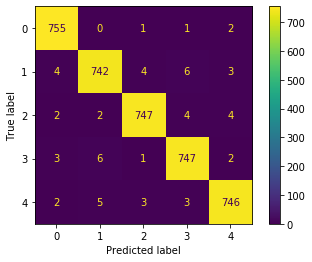

Test Accuracy: 0.9847167325428196


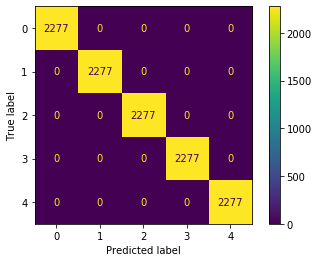

Test Accuracy: 1.0


In [21]:
pred = best_arch["SGD"].prediction(test_data)
best_arch["SGD"].confusion_matrix(pred, y_test)
test_acc = best_arch["SGD"].accuracy(pred, y_test)
print("Test Accuracy:", test_acc)
# pred = best_arch["SGD"].prediction(train_data)
# best_arch["SGD"].confusion_matrix(pred, y_train)
# test_acc = best_arch["SGD"].accuracy(pred, y_train)
# print("Test Accuracy:", test_acc)


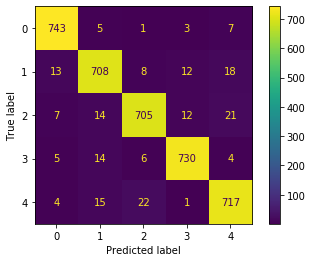

Test Accuracy: 0.9494071146245059


In [17]:
pred = best_arch["VGD"].prediction(test_data)
best_arch["VGD"].confusion_matrix(pred, y_test)
test_acc = best_arch["VGD"].accuracy(pred, y_test)
print("Test Accuracy:", test_acc)

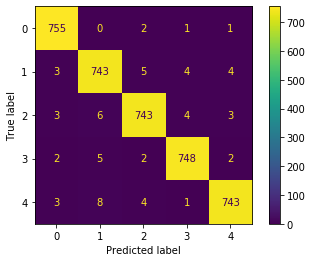

Test Accuracy: 0.983399209486166


In [18]:
pred = best_arch["NAG"].prediction(test_data)
best_arch["NAG"].confusion_matrix(pred, y_test)
test_acc = best_arch["NAG"].accuracy(pred, y_test)
print("Test Accuracy:", test_acc)

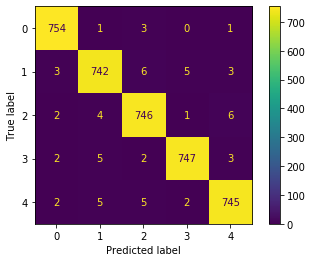

Test Accuracy: 0.9839262187088273


In [19]:
pred = best_arch["RMSProp"].prediction(test_data)
best_arch["RMSProp"].confusion_matrix(pred, y_test)
test_acc = best_arch["RMSProp"].accuracy(pred, y_test)
print("Test Accuracy:", test_acc)

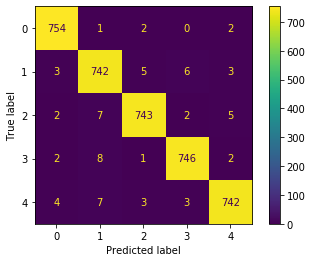

Test Accuracy: 0.9820816864295125


In [20]:
pred = best_arch["ADM"].prediction(test_data)
best_arch["ADM"].confusion_matrix(pred, y_test)
test_acc = best_arch["ADM"].accuracy(pred, y_test)
print("Test Accuracy:", test_acc)